In [1]:
# This is the enhanced version what was covered in the class on Session 13A
# It has some additional code for understanding the code, comments to understand its working
# Enhanced ouput .h file generated with addtional information on the hearder part
# np.ndarray: how to convert (28, 28) to ndarray of shape of (1, 28, 28) is added
# No need to make any changes to the ESP32 side code. The header files generated by this
# File will work fine with the ESP32 .ino file shared.
# The MNIST database (Modified National Institute of Standards and Technology database)

import tensorflow as tf
# NumPy is a math library
import pandas as pd
import numpy as np
# Matplotlib is a graphing library
import matplotlib.pyplot as plt
import matplotlib.image as mpimg

# math is Python's math library
import math

# We'll use Keras to create a simple model architecture
# Note: Changed tf.keras below to tensorflow.keras (code from the book)
from tensorflow.keras import layers

In [2]:
mnist = tf.keras.datasets.mnist
print(mnist)
# This accesses the MNIST train and test data from the link below in .npz format
# https://storage.googleapis.com/tensorflow/tf-keras-datasets/mnist.npz
# .npz is a binary data format to store any multidimensional NumPy array data.
# You can get more information about the implementation of mnist.load_data() from the link below
# https://github.com/keras-team/keras/blob/master/keras/datasets/mnist.py#L11
(x_train, y_train), (x_test, y_test) = mnist.load_data()
print(x_train.shape, y_train.shape)
print(x_test.shape, y_test.shape)
print(y_train[0]) # Output is an integer value between 0 to 9 based on the image in x_train[]
print(y_test[0])
print(x_train.dtype, y_train.dtype)
print(x_test.dtype, y_test.dtype)
x_train, x_test = x_train / 255.0, x_test / 255.0
# Divide the pixel values ranging from 0 to 255 by 255.0 to make it 0.0 to 1.0
print(x_train.dtype)

<module 'keras.api._v2.keras.datasets.mnist' from 'd:\\ProjectDdrive\\iot_and_ec_files\\mnist_env\\lib\\site-packages\\keras\\api\\_v2\\keras\\datasets\\mnist\\__init__.py'>
(60000, 28, 28) (60000,)
(10000, 28, 28) (10000,)
5
7
uint8 uint8
uint8 uint8
float64


In [3]:
plt.figure(figsize=(28,28))

<Figure size 2800x2800 with 0 Axes>

<Figure size 2800x2800 with 0 Axes>

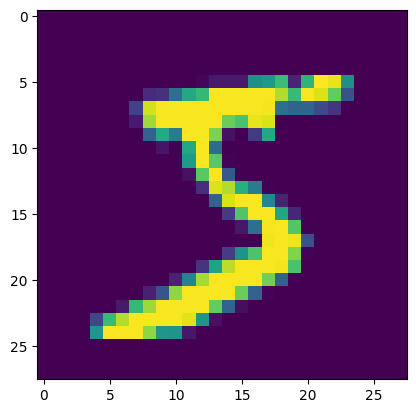

In [4]:
plt.imshow(x_train[0])

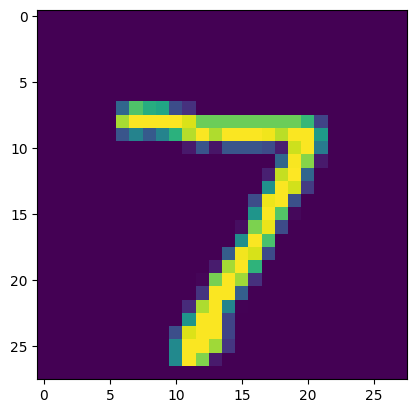

In [5]:
plt.imshow(x_test[0])

In [6]:
# Here, model is generated with all the configurable parameters passed together except
# the optimizer, loss_fn, activation fn for the output layer (softmax) etc.
model = tf.keras.models.Sequential([
  tf.keras.layers.Flatten(input_shape=(28, 28)),
  tf.keras.layers.Dense(128, activation='relu'),
  tf.keras.layers.Dropout(0.2),
  tf.keras.layers.Dense(10)
])
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten (Flatten)           (None, 784)               0         
                                                                 
 dense (Dense)               (None, 128)               100480    
                                                                 
 dropout (Dropout)           (None, 128)               0         
                                                                 
 dense_1 (Dense)             (None, 10)                1290      
                                                                 
Total params: 101,770
Trainable params: 101,770
Non-trainable params: 0
_________________________________________________________________


In [7]:
# Let us now see how we can generate the same model in stages and view the model summaries
# at every stage to see how the model is getting built.
# Final summary of the model will be the same as above
DENSE1_SIZE = 128

model = tf.keras.models.Sequential()
model.add(tf.keras.layers.Flatten(input_shape=(28,28)))
print(model.summary())
model.add(tf.keras.layers.Dense(DENSE1_SIZE, activation='relu'))
print(model.summary())
model.add(tf.keras.layers.Dropout(0.2))
model.add(tf.keras.layers.Dense(10,activation='softmax'))  # Softmax is also added here itself
print(model.summary()) # This summary is same as what was got previously

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten_1 (Flatten)         (None, 784)               0         
                                                                 
Total params: 0
Trainable params: 0
Non-trainable params: 0
_________________________________________________________________
None
Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten_1 (Flatten)         (None, 784)               0         
                                                                 
 dense_2 (Dense)             (None, 128)               100480    
                                                                 
Total params: 100,480
Trainable params: 100,480
Non-trainable params: 0
_________________________________________________________________
None
Model: "sequential_1"


In [8]:
# Both x_train[:1] and x_train[0] are numpy.ndarray types, but their shapes are different
print(x_train[:1].shape, x_train[0].shape)
# To make a new shape from one shape to the other can be done by using np.reshape()
# It accepts two params. np.reshape(original np array, new shape as list or tuple)
npNew = np.reshape(x_train[0], [1, 28, 28])
print(npNew.shape)
predictions = model(x_train[:1]).numpy()
print(predictions.shape)
print(predictions)

(1, 28, 28) (28, 28)
(1, 28, 28)
(1, 10)
[[0.06838216 0.05991512 0.10572474 0.15873654 0.08392526 0.17311408
  0.07626601 0.05884154 0.09888071 0.1162138 ]]


In [9]:
# model does not accept (28, 28) only (1, 28, 28). The below code is to see how shape is changed
# To make a new shape from one shape, we can use np.reshape()
# It accepts two params. np.reshape(original np array, new shape as list or tuple)
print(x_train[0].shape)
npNew = np.reshape(x_train[0], [1, 28, 28])
print(npNew.shape)
predictions = model(npNew).numpy()
print(predictions.shape)
print(predictions)

(28, 28)
(1, 28, 28)
(1, 10)
[[0.06838216 0.05991512 0.10572474 0.15873654 0.08392526 0.17311408
  0.07626601 0.05884154 0.09888071 0.1162138 ]]


In [10]:
# Define the loss_fn object to be used during training for multi-label classification problems
# The from_lgits=False means that already the model outputs probability values from 0.0 to 1.0
# The last year of the model is already has Softmax as activation function.
loss_fn = tf.keras.losses.SparseCategoricalCrossentropy(from_logits=False)

In [11]:
loss_fn(y_train[:1], predictions).numpy()

1.7538046

In [12]:
model.compile(optimizer='adam',
              loss=loss_fn,
              metrics=['accuracy'])

In [13]:
NUM_OF_EPOCHS = 5
model.fit(x_train, y_train, epochs=NUM_OF_EPOCHS)

Epoch 1/5
1875/1875 [==============================] - 14s 6ms/step - loss: 0.2962 - accuracy: 0.9130
Epoch 2/5
1875/1875 [==============================] - 11s 6ms/step - loss: 0.1439 - accuracy: 0.9570
Epoch 3/5
1875/1875 [==============================] - 8s 4ms/step - loss: 0.1087 - accuracy: 0.9673
Epoch 4/5
1875/1875 [==============================] - 7s 4ms/step - loss: 0.0891 - accuracy: 0.9728
Epoch 5/5
1875/1875 [==============================] - 7s 4ms/step - loss: 0.0738 - accuracy: 0.9768


In [14]:
model.evaluate(x_test,  y_test, verbose=2)

313/313 - 1s - loss: 0.0778 - accuracy: 0.9745 - 1s/epoch - 3ms/step


[0.07784327119588852, 0.9745000004768372]

In [15]:
# This is removed. Because Softmax has already been added during the model creation itself
#probability_model = tf.keras.Sequential([
#  model,
#  tf.keras.layers.Softmax()
#])

In [16]:
#probability_model(x_test[:5]) # not needed now

In [17]:
print(y_test[:5])

[7 2 1 0 4]


In [18]:
def representative_dataset():
    for _ in range(100):
      data =  x_train
      yield [data.astype(np.float32)]

print(representative_dataset())

<generator object representative_dataset at 0x0000026428E7D548>


In [19]:
tf.saved_model.save(model, "saved_MNIST_model_keras_dir")

INFO:tensorflow:Assets written to: saved_MNIST_model_keras_dir\assets


In [20]:
import tensorflow as tf

# Converting a tf.Keras model to a TensorFlow Lite model using from_saved_model API.
#converter = tf.lite.TFLiteConverter.from_keras_model(model_2)
# The prefered API to convert to TFLite is from from_saved_model.
converter = tf.lite.TFLiteConverter.from_saved_model("saved_MNIST_model_keras_dir")
converter.optimizations = [tf.lite.Optimize.DEFAULT]
converter.representative_dataset = representative_dataset
tflite_model = converter.convert()

In [21]:
# Save the model in TFlite format whose size is just 5 KB
# It brings down the size from 40 KB to 5 KB, 8 times reduction
with open('MNISTClassifyModel_new.tflite', 'wb') as f:
  f.write(tflite_model)

In [22]:
interpreter = tf.lite.Interpreter(model_path="MNISTClassifyModel_new.tflite")
interpreter.allocate_tensors()

In [23]:
# Get input and output tensors.
input_details = interpreter.get_input_details()
output_details = interpreter.get_output_details()
print('input_details:\n', input_details)
print('output_details:\n', output_details)

input_details:
 [{'name': 'serving_default_flatten_1_input:0', 'index': 0, 'shape': array([ 1, 28, 28]), 'shape_signature': array([-1, 28, 28]), 'dtype': <class 'numpy.float32'>, 'quantization': (0.0, 0), 'quantization_parameters': {'scales': array([], dtype=float32), 'zero_points': array([], dtype=int32), 'quantized_dimension': 0}, 'sparsity_parameters': {}}]
output_details:
 [{'name': 'StatefulPartitionedCall:0', 'index': 11, 'shape': array([ 1, 10]), 'shape_signature': array([-1, 10]), 'dtype': <class 'numpy.float32'>, 'quantization': (0.0, 0), 'quantization_parameters': {'scales': array([], dtype=float32), 'zero_points': array([], dtype=int32), 'quantized_dimension': 0}, 'sparsity_parameters': {}}]


In [24]:
# Test the model on random input data.
input_shape = input_details[0]['shape']
print(input_shape)
input_data = [x_test[0]]
#print(input_data)
input_data = np.array(input_data, dtype=np.float32)
interpreter.set_tensor(input_details[0]['index'], input_data)

interpreter.invoke()

# The function `get_tensor()` returns a copy of the tensor data.
# Use `tensor()` in order to get a pointer to the tensor.
output_data = interpreter.get_tensor(output_details[0]['index'])
print(output_data)
print(y_test[0])

[ 1 28 28]
[[0.         0.         0.         0.         0.         0.
  0.         0.99609375 0.         0.        ]]
7


In [25]:
# Test the model on random input data.
input_shape = input_details[0]['shape']
print(input_shape)
input_data = [x_train[0]]
#print(input_data)
input_data = np.array(input_data, dtype=np.float32)
interpreter.set_tensor(input_details[0]['index'], input_data)

interpreter.invoke()

# The function `get_tensor()` returns a copy of the tensor data.
# Use `tensor()` in order to get a pointer to the tensor.
output_data = interpreter.get_tensor(output_details[0]['index'])
print(output_data)
print(y_train[0])

[ 1 28 28]
[[0.        0.        0.        0.0390625 0.        0.9609375 0.
  0.        0.        0.       ]]
5


In [26]:
# Function to convert some hex values into an array for C programming
import time, sys

# Function to convert some hex values into an array for C programming
def hex_to_c_array(hex_data, var_name):
    c_str = ""

    # Create header guard
    c_str += '#ifndef ' + var_name.upper() + '_H\n'
    c_str += "#define " + var_name.upper() + '_H\n\n'

    c_str += "/*\n Author: Mouli Sankaran \n"
    c_str += " CAUTION: This is an auto generated file.\n DO NOT EDIT OR MAKE ANY CHANGES TO IT.\n"

# Time stamping of this model data in the generated file
    localtime = time.asctime( time.localtime(time.time()) )
    c_str += " This model data was generated on " + localtime+ '\n\n'
    print("This model data was generated on:", localtime)

# Add information about the verisons of tools and packages used in generating this header file
    c_str += " Tools used:\n Python:" + str(sys.version) + "\n Numpy:" \
            + str(np.version.version) + "\n TensorFlow:" + str(sys.version) \
            + "\n Keras: "+ str(tf.keras.__version__) + "\n\n"
    print("Tools used: Python:", sys.version, "\n Numpy:", np.version.version, \
          "\n TensorFlow:", sys.version, "\n Keras: ", tf.keras.__version__, "\n\n")

# Training details of the model
    c_str += ' Model details are:\n'
    c_str += ' NUM_OF_EPOCHS  = ' + str(NUM_OF_EPOCHS) + '\n*/\n'

# Generate 'C' constants for the no. of nodes in each layer
    c_str +=   'const int ' + 'DENSE1_SIZE' + ' = ' + str(DENSE1_SIZE) + ';\n'

    # Add array length at the top of the file
    c_str += '\nalignas(8) const unsigned int ' + var_name + '_len = '\
            + str(len(hex_data)) + ';\n'

    # Declare C variable
    c_str += 'const unsigned char ' + var_name + '[] = {'
    hex_array = []
    for i, val in enumerate(hex_data):
        # Construct string from hex
        hex_str = format(val, '#04x')

        # Add formating so each line stays within 80 characters
        if (i + 1) < len(hex_data):
          hex_str += ','
        if (i + 1) % 12 == 0:
          hex_str += '\n'
        hex_array.append(hex_str)

    # Add closing brace
    c_str += '\n' + format(''.join(hex_array)) + '\n};\n\n'

    # Close out header guard
    c_str += '#endif //' + var_name.upper() + '_H'

    return c_str

In [27]:
# Write TFLite model to a C source (or header) file
with open("MNIST_model_esp32_new" + '.h', 'w') as file:
  file.write(hex_to_c_array(tflite_model, "MNIST_model_esp32_new"))

This model data was generated on: Tue Nov  5 22:00:56 2024
Tools used: Python: 3.7.16 (default, Jan 17 2023, 16:06:28) [MSC v.1916 64 bit (AMD64)] 
 Numpy: 1.19.5 
 TensorFlow: 3.7.16 (default, Jan 17 2023, 16:06:28) [MSC v.1916 64 bit (AMD64)] 
 Keras:  2.7.0 




In [28]:
print(x_test.shape)
print(x_test[0].shape)
firstPic = x_test[0]
print(y_test[0])
predictions = model.predict(x_test)
#print(predictions)
print(predictions[0])



(10000, 28, 28)
(28, 28)
7
[1.5538484e-07 1.4257744e-09 1.1710526e-06 4.3112846e-04 1.0663037e-11
 1.9155298e-06 1.1090517e-10 9.9954093e-01 4.0076379e-06 2.0727455e-05]


In [29]:
print(x_test[0].shape)
print(len(x_test[0]))
size = len(x_test[0])
#print(x_test[0])
print(x_test[0][0][0])

(28, 28)
28
0.0


In [30]:
def gen_x_test0_hex(data, name):
#    print('\n ', name, ':\n {')
    c_str = 'float ' + name + '[784] = { '
    for i in range(size):
        for j in range(size):
#            print(' ', data[i][j], 'f,', sep='', end='')
            c_str += "%s%f%s" % (' ', data[i][j], 'f,')

    c_str += '\n};\n'
#    print('\n};\n')
    return c_str


# Write TFLite model to a C source (or header) file
with open("MNIST_x_test0_data_new" + '.h', 'w') as file:
    file.write(gen_x_test0_hex(x_test[0], 'x_test0'))

# Write TFLite model to a C source (or header) file
with open("MNIST_x_train0_data_new" + '.h', 'w') as file:
    file.write(gen_x_test0_hex(x_train[0], 'x_train0'))

In [31]:
interpreter = tf.lite.Interpreter(model_path="MNISTClassifyModel_new.tflite")
interpreter.allocate_tensors()

In [32]:
# Get input and output tensors.
input_details = interpreter.get_input_details()
output_details = interpreter.get_output_details()
print('input_details:\n', input_details)
print('output_details:\n', output_details)

input_details:
 [{'name': 'serving_default_flatten_1_input:0', 'index': 0, 'shape': array([ 1, 28, 28]), 'shape_signature': array([-1, 28, 28]), 'dtype': <class 'numpy.float32'>, 'quantization': (0.0, 0), 'quantization_parameters': {'scales': array([], dtype=float32), 'zero_points': array([], dtype=int32), 'quantized_dimension': 0}, 'sparsity_parameters': {}}]
output_details:
 [{'name': 'StatefulPartitionedCall:0', 'index': 11, 'shape': array([ 1, 10]), 'shape_signature': array([-1, 10]), 'dtype': <class 'numpy.float32'>, 'quantization': (0.0, 0), 'quantization_parameters': {'scales': array([], dtype=float32), 'zero_points': array([], dtype=int32), 'quantized_dimension': 0}, 'sparsity_parameters': {}}]


In [33]:
# Test the model on random input data.
input_shape = input_details[0]['shape']
print(input_shape)
input_data = [x_test[0]]
#print(input_data)
input_data = np.array(input_data, dtype=np.float32)
interpreter.set_tensor(input_details[0]['index'], input_data)

interpreter.invoke()

# The function `get_tensor()` returns a copy of the tensor data.
# Use `tensor()` in order to get a pointer to the tensor.
output_data = interpreter.get_tensor(output_details[0]['index'])
print(output_data)
print(y_test[0])

[ 1 28 28]
[[0.         0.         0.         0.         0.         0.
  0.         0.99609375 0.         0.        ]]
7


In [34]:
# Test the model on random input data.
input_shape = input_details[0]['shape']
print(input_shape)
input_data = [x_train[0]]
#print(input_data)
input_data = np.array(input_data, dtype=np.float32)
interpreter.set_tensor(input_details[0]['index'], input_data)

interpreter.invoke()

# The function `get_tensor()` returns a copy of the tensor data.
# Use `tensor()` in order to get a pointer to the tensor.
output_data = interpreter.get_tensor(output_details[0]['index'])
print(output_data)
print(y_train[0])

[ 1 28 28]
[[0.        0.        0.        0.0390625 0.        0.9609375 0.
  0.        0.        0.       ]]
5


In [35]:
print("he")

he
